In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np


In [4]:
file_path = pd.read_csv("../Project/data/shark_attack_cleaned.csv")
df = pd.DataFrame(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '../Project/data/shark_attack_cleaned.csv'

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df['species'] = df['species'].str.lower()

valid_species = df['species'].apply(lambda x: re.sub(r"[0-9'`[].*$]", '', str(x)))
valid_species = valid_species.str.replace('invalid', '').str.replace('shark involvement prior to death was not confirmed', '')

shark_names = [
    "white", "hammerhead", "tiger", "bull", 
    "nurse", "mako", "thresher", "blue", 
    "lemon", "whale", "blacktip", "silky", 
    "goblin", "dogfish", "sandbar", "megamouth", 
    "porbeagle", "greenland", "zebra", "wobbegong"
]

valid_species = valid_species.apply(lambda x: next((name + " shark" for name in shark_names if name in x), 'unknown'))

df['species'] = valid_species


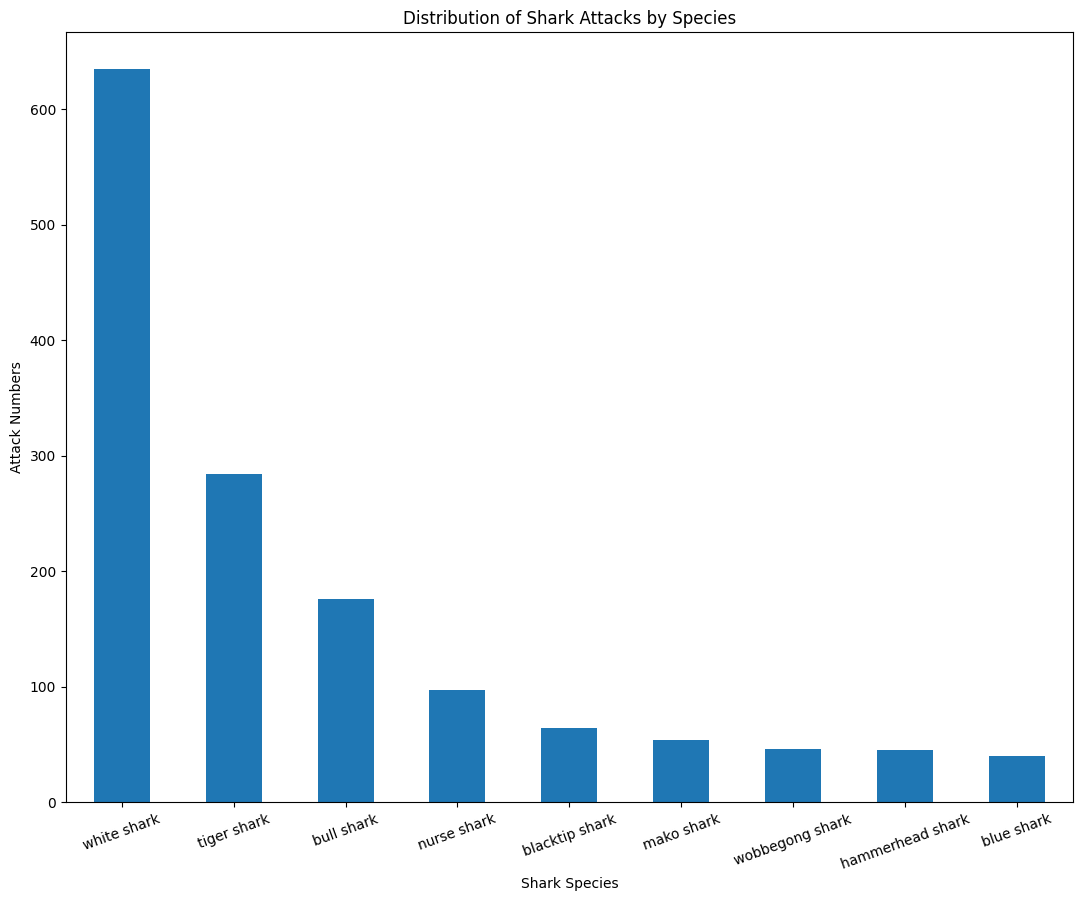

In [ ]:
species_counts = df['species'].value_counts().head(10)
species_counts = species_counts[species_counts.index != 'unknown']


species_counts.plot(kind='bar', figsize=(13, 10))
plt.title('Distribution of Shark Attacks by Species')
plt.xlabel('Shark Species')
plt.ylabel('Attack Numbers')
plt.xticks(rotation=20)

nombre_archivo = f'{"distribution"}.png'
ruta_carpeta = '../Project/images/'
plt.savefig(f'{ruta_carpeta}{nombre_archivo}')
    
plt.show()

In [ ]:
fatal_attacks = df[(df['fatal'] == 'Y') & (df['species'] != 'unknown')]

species_fatal_counts = fatal_attacks.groupby('species')['fatal'].count()

species_fatal_counts = species_fatal_counts.sort_values(ascending=False)

total_fatal_attacks = species_fatal_counts.sum()
species_fatal_percentages = (species_fatal_counts / total_fatal_attacks) * 100

top_species_fatal = species_fatal_counts.head(10)  # Get the top 10 species

fig, ax = plt.subplots(figsize=(10, 7))
bars = top_species_fatal.plot(kind='bar', color='skyblue', ax=ax)

for bar, percent in zip(bars.patches, species_fatal_percentages[top_species_fatal.index]):
    height = bar.get_height()
    ax.annotate(f'{percent:.2f}%', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.title('Top Shark Species in Fatal Attacks')
plt.xlabel('Shark Species')
plt.ylabel('Number of Fatal Attacks')
plt.xticks(rotation=45)

nombre_archivo = f'{"Fatal_Attacks"}.png'
ruta_carpeta = '../Project/images/'
plt.savefig(f'{ruta_carpeta}{nombre_archivo}')

plt.show()

NameError: name 'df' is not defined

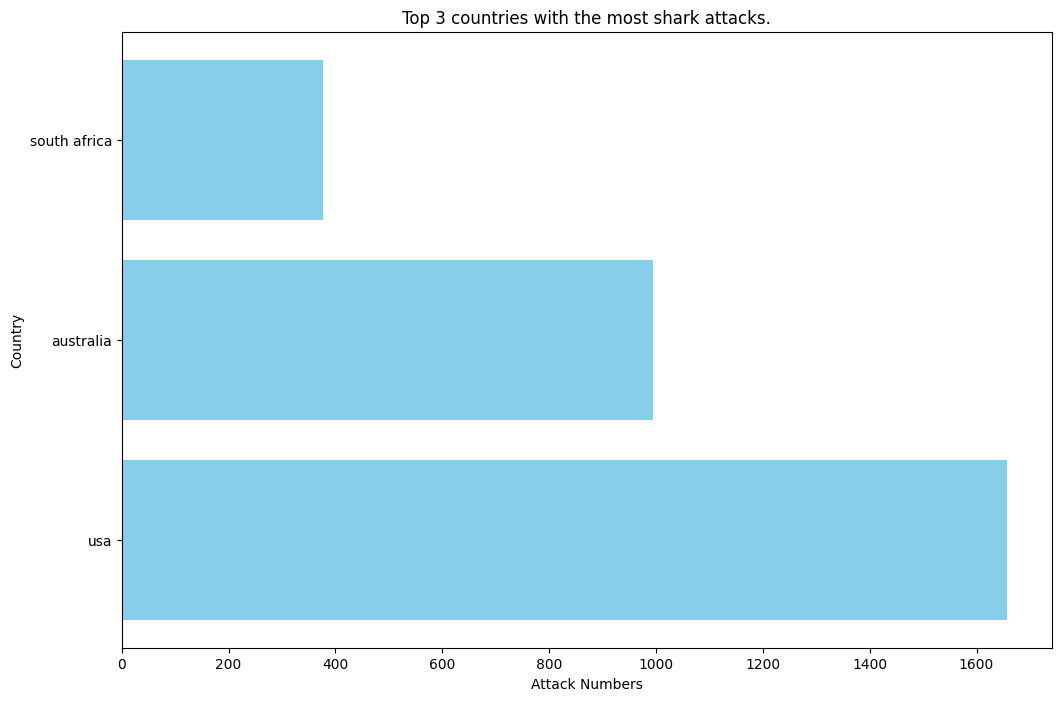

In [ ]:
attacks_by_country_species = df.groupby(['country', 'species']).size().reset_index(name='attack_count')

top_species = attacks_by_country_species[attacks_by_country_species['species'] != 'Unknown']
top_species = top_species[top_species['species'].isin(top_species['species'].value_counts().head(10).index)]

top_countries = top_species['country'].value_counts().head(3).index
top_species = top_species[top_species['country'].isin(top_countries)]

top_species = top_species.sort_values(by='attack_count', ascending=False)

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(range(len(top_species['species'])))
plt.barh(top_species['country'], top_species['attack_count'], color='skyblue')
plt.xlabel('Attack Numbers')
plt.ylabel('Country')
plt.title('Top 3 countries with the most shark attacks.')

nombre_archivo = f'{"Top_countries"}.png'
ruta_carpeta = '../Project/images/'
plt.savefig(f'{ruta_carpeta}{nombre_archivo}')


plt.show()

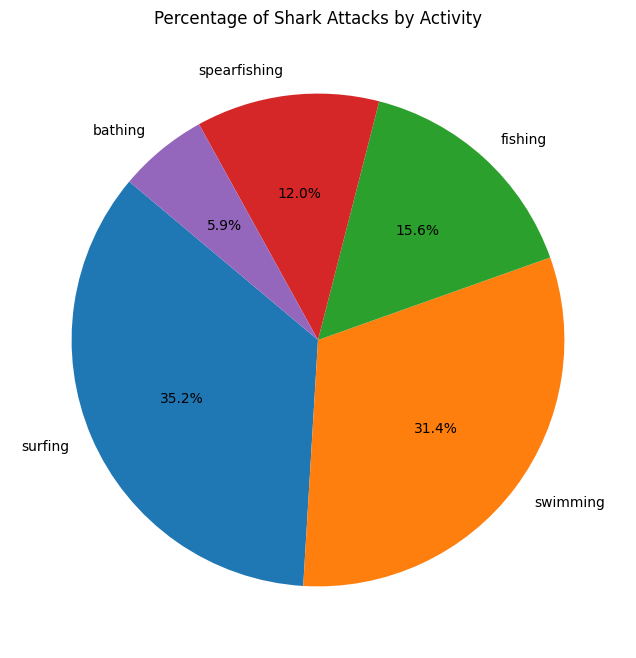

In [ ]:
df = df[(df['activity'] != -1) & (df['activity'] != '-1')]

activity_counts = df['activity'].value_counts().head(5)


plt.figure(figsize=(8, 8))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Shark Attacks by Activity')

nombre_archivo = f'{"Percentage"}.png'
ruta_carpeta = '../Project/images/'
plt.savefig(f'{ruta_carpeta}{nombre_archivo}')

plt.show()